In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset of the Project

In [2]:
df = pd.read_csv("h1b1.csv")

In [3]:
df

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003
...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3002458 entries, 0 to 3002457
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0          int64  
 1   CASE_STATUS         object 
 2   EMPLOYER_NAME       object 
 3   SOC_NAME            object 
 4   JOB_TITLE           object 
 5   FULL_TIME_POSITION  object 
 6   PREVAILING_WAGE     float64
 7   YEAR                float64
 8   WORKSITE            object 
 9   lon                 float64
 10  lat                 float64
dtypes: float64(4), int64(1), object(6)
memory usage: 252.0+ MB


In [5]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


## Data Cleansing

### Missing Values

In [6]:
(df.isna()==True).sum()

Unnamed: 0                 0
CASE_STATUS               13
EMPLOYER_NAME             59
SOC_NAME               17734
JOB_TITLE                 43
FULL_TIME_POSITION        15
PREVAILING_WAGE           85
YEAR                      13
WORKSITE                   0
lon                   107242
lat                   107242
dtype: int64

### Outliers

In [7]:
total = df['PREVAILING_WAGE'].count()
total

3002373

In [8]:
numerical_columns = ['PREVAILING_WAGE']

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
Q2 =df[numerical_columns].median()
IQR = Q3 - Q1



lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:",Q1)
print("Q3:",Q3)
print("Q2:",Q2)


Q1: PREVAILING_WAGE    54371.0
Name: 0.25, dtype: float64
Q3: PREVAILING_WAGE    81432.0
Name: 0.75, dtype: float64
Q2: PREVAILING_WAGE    65021.0
dtype: float64


In [9]:


outliers = {}
for col in df[numerical_columns]:
    outliers[col] = ((df[col] < lower_bound[col]) | (df[col] > upper_bound[col]))

outlier_counts = {}
for col in df[numerical_columns]:
    outlier_counts[col] = outliers[col].sum()

print(outlier_counts)


{'PREVAILING_WAGE': 117316}


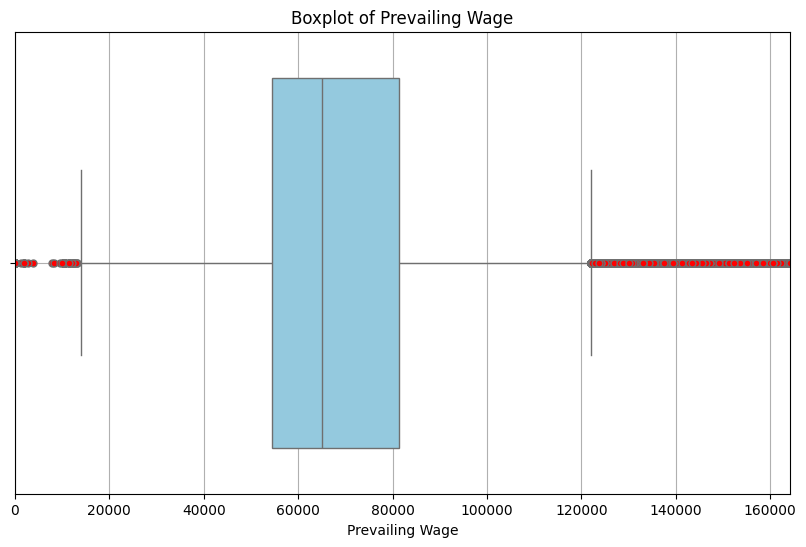

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PREVAILING_WAGE', data=df,showfliers=True, color='skyblue',flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
plt.title('Boxplot of Prevailing Wage')
plt.xlabel('Prevailing Wage')
plt.xlim(left=0, right=df['PREVAILING_WAGE'].quantile(0.99))
#plt.ylabel('Job Title')
plt.grid(True)
plt.show()

In [11]:
job_titles = df['JOB_TITLE'].value_counts().head(5)
print(job_titles)

JOB_TITLE
PROGRAMMER ANALYST     249038
SOFTWARE ENGINEER      121307
COMPUTER PROGRAMMER     70570
SYSTEMS ANALYST         61965
SOFTWARE DEVELOPER      42907
Name: count, dtype: int64


### This is done to limit the data to a manageable range for analysis. The purpose of the analysis is to visualize the wage distribution for the top 5 job titles with the highest frequency in the filtered data.

Index(['PROGRAMMER ANALYST', 'SOFTWARE ENGINEER', 'COMPUTER PROGRAMMER',
       'SYSTEMS ANALYST', 'SOFTWARE DEVELOPER'],
      dtype='object', name='JOB_TITLE')


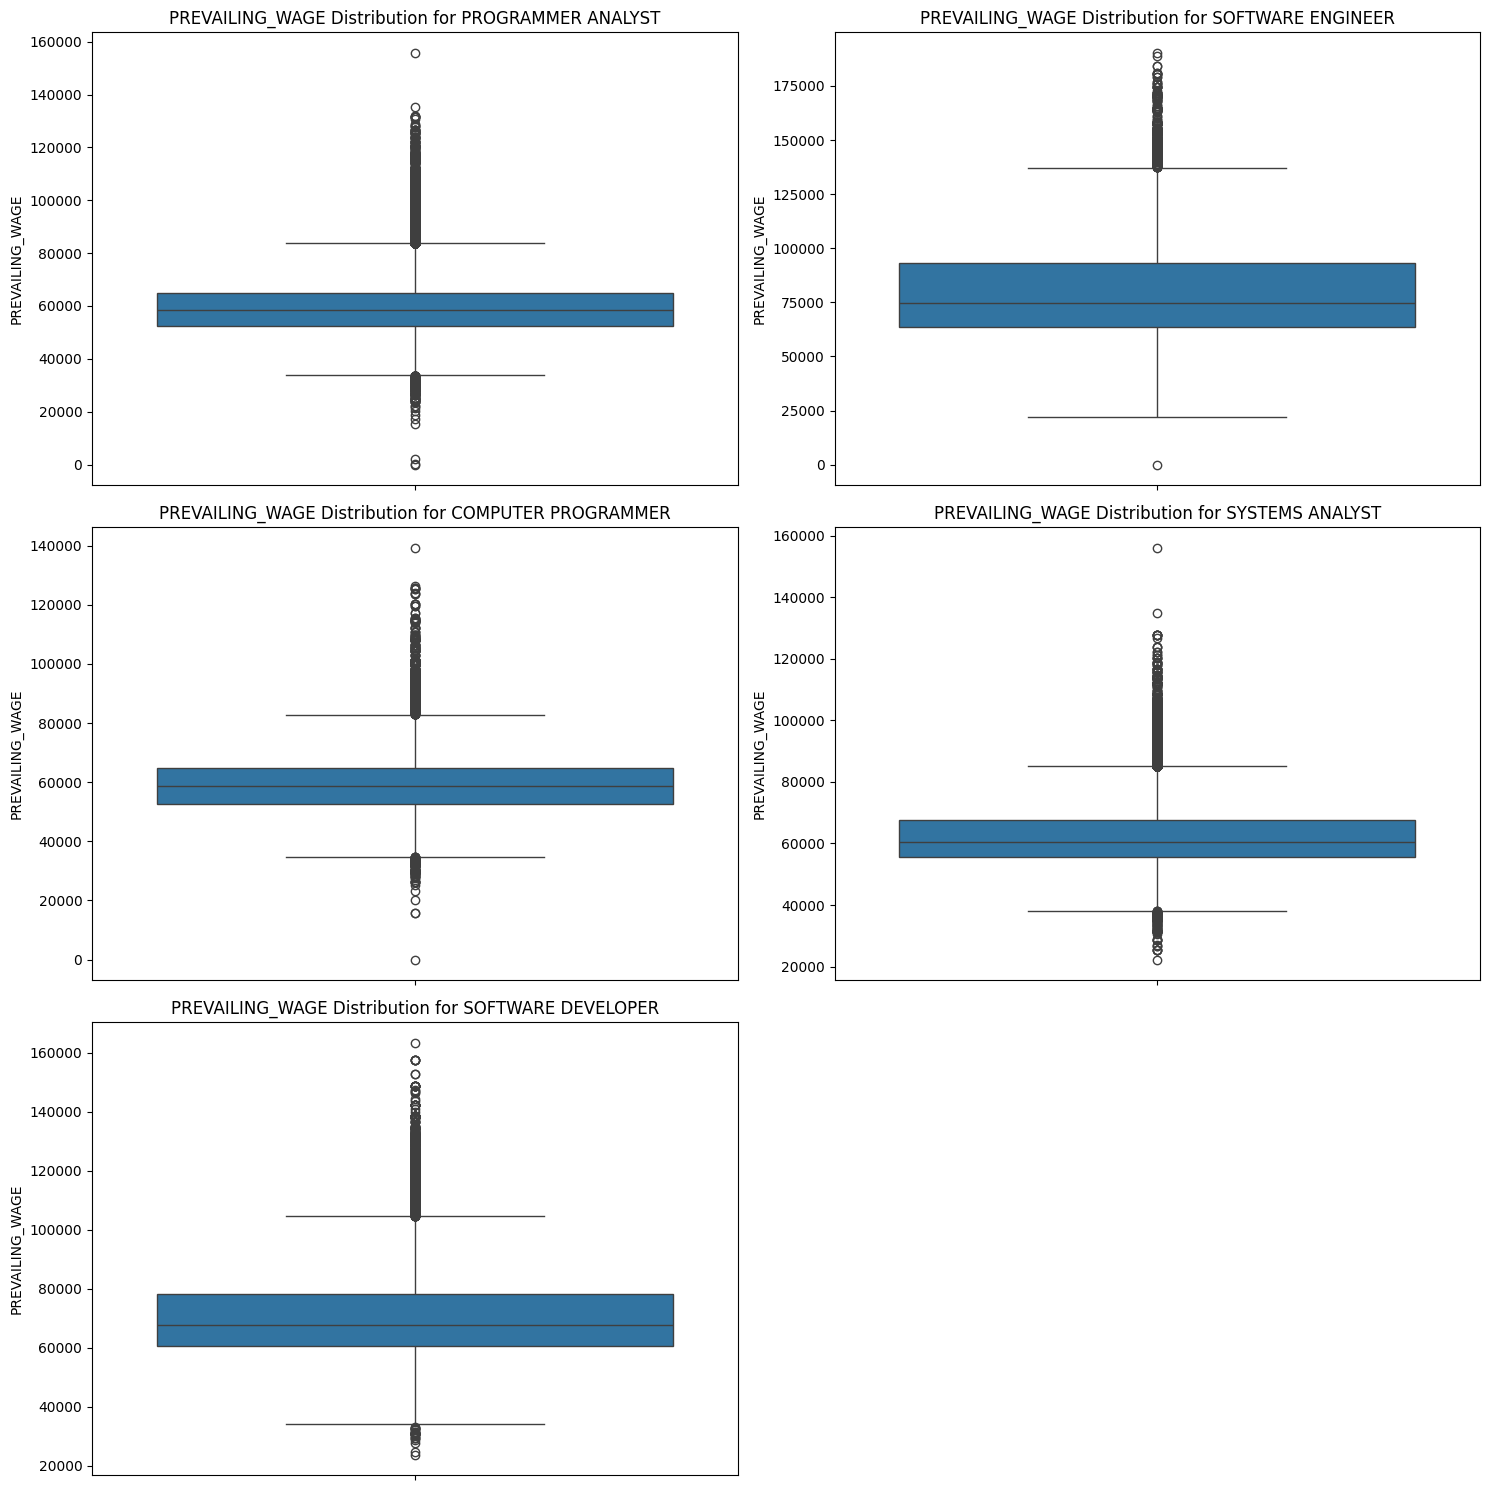

In [12]:
#Wage distribution for top 5 roles

filtered_df = df[df['PREVAILING_WAGE'] < 200000]

#top 5 job titles
top_job_titles = filtered_df['JOB_TITLE'].value_counts().head(5).index
print(top_job_titles)


num_plots = len(top_job_titles)
num_cols = 2  
num_rows = (num_plots + 1) // num_cols

plt.figure(figsize=(15, 5 * num_rows))

for i, job_title in enumerate(top_job_titles, start=1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(data=filtered_df[filtered_df['JOB_TITLE'] == job_title], y='PREVAILING_WAGE')
    plt.title(f'PREVAILING_WAGE Distribution for {job_title}')
    plt.ylabel('PREVAILING_WAGE')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Dealing with the Missing Values

In [13]:
# Fill missing values with median for numeric columns
df['PREVAILING_WAGE'].fillna(df['PREVAILING_WAGE'].median(), inplace=True)
median_year = df['YEAR'].median()
df['YEAR'].fillna(median_year, inplace=True)

# Fill missing values with mode for categorical columns
df['CASE_STATUS'].fillna(df['CASE_STATUS'].mode()[0], inplace=True)
df['EMPLOYER_NAME'].fillna(df['EMPLOYER_NAME'].mode()[0], inplace=True)
df['JOB_TITLE'].fillna(df['JOB_TITLE'].mode()[0], inplace=True)
df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode()[0], inplace=True)
df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0],inplace=True)

In [14]:
from sklearn.impute import SimpleImputer

# Fill values for lon and lat columns with median
imputer_lon_lat = SimpleImputer(strategy='median')
df[['lon', 'lat']] = imputer_lon_lat.fit_transform(df[['lon', 'lat']])


In [15]:
(df.isna()==True).sum()

Unnamed: 0            0
CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
lon                   0
lat                   0
dtype: int64

In [16]:
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [17]:
df.tail()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002453,3002454,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002457,3002458,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,"ALTANTA, GEORGIA",-84.387982,33.748995


### Analysis of the Dataset

#### Petition Distributed by case statuses

In [18]:
cs = df['CASE_STATUS'].value_counts()
#print(cs[:4])
cs

CASE_STATUS
CERTIFIED                                             2615636
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: count, dtype: int64

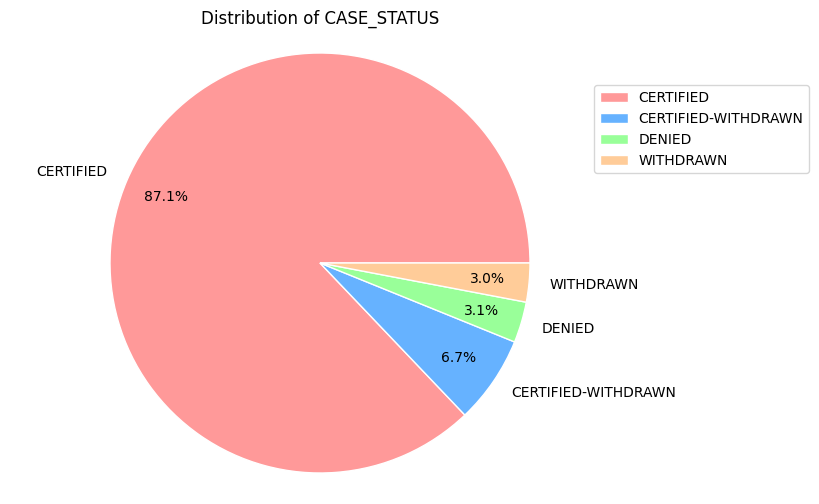

In [19]:
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Plot the pie chart
plt.figure(figsize=(8, 6), dpi=100)
c, _, _ = plt.pie(x=cs[:4], labels=cs.index[:4], autopct='%.1f%%', colors=colors, pctdistance=0.8)
plt.title('Distribution of CASE_STATUS')

# Equal aspect ratio ensures a circular pie
plt.axis('equal')  

# Adjust label positions
for wedge in c:
    wedge.set_edgecolor('white')  # Add white border to pie slices

# Remove unnecessary spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust legend position
plt.legend(c, cs.index, loc='upper right', bbox_to_anchor=(1.3, 0.9))

plt.show()

### Top 15 companies that filed the most visa application

In [20]:
top_companies = df['EMPLOYER_NAME'].value_counts().head(15)
top_companies


EMPLOYER_NAME
INFOSYS LIMITED                                    130651
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
LARSEN & TOUBRO INFOTECH LIMITED                    17457
CAPGEMINI AMERICA INC                               16725
GOOGLE INC.                                         16473
IBM CORPORATION                                     13276
IGATE TECHNOLOGIES INC.                             12564
Name: count, dtype: int64

C:\Users\aakar\AppData\Local\Temp\ipykernel_5400\1906354361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_companies.values,y=top_companies.index,orient='h',palette='viridis')


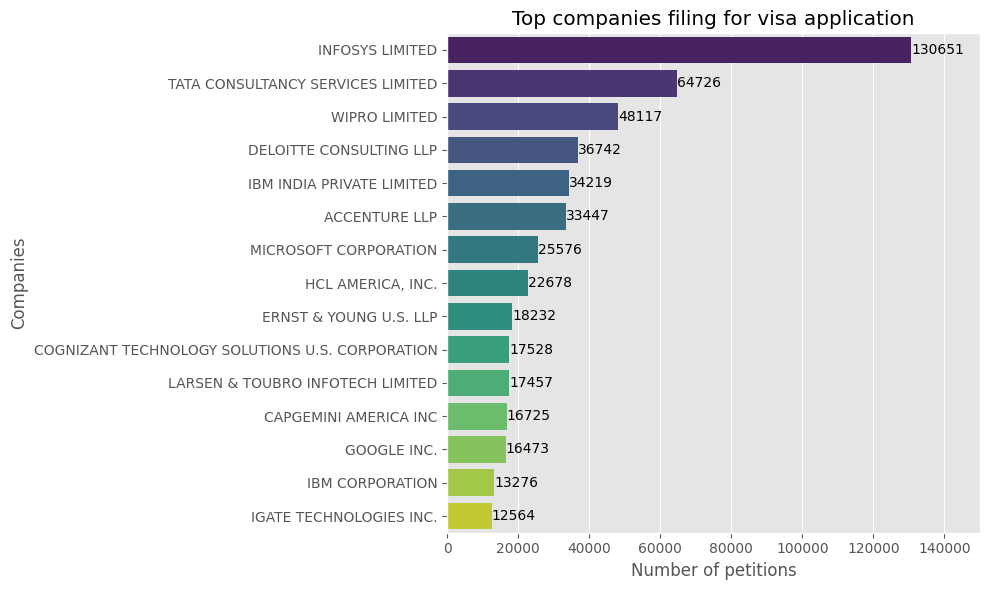

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6),dpi=100)
barplot = sns.barplot(x=top_companies.values,y=top_companies.index,orient='h',palette='viridis')
plt.title("Top companies filing for visa application")
plt.xlabel("Number of petitions")
plt.ylabel("Companies")


for i, v in enumerate(top_companies.values):
    barplot.annotate(str(v), xy=(v, i), xytext=(v + 10, i), color='black', va='center',ha='left')
plt.xlim(right=max(top_companies.values) + 19349)
plt.tight_layout()
plt.show()

### Top employers granting maximum prevailing wages

In [22]:
top_emp_max_wages = df[df['CASE_STATUS']=='CERTIFIED'].groupby('EMPLOYER_NAME').agg({'PREVAILING_WAGE':'max'}).nlargest(10,'PREVAILING_WAGE')
top_emp_max_wages

,PREVAILING_WAGE
EMPLOYER_NAME,
INTEGRATED MEDICAL SERVICES,306049120.0
DEPARTMENT OF VETERANS AFFAIRS/NMVAHCS,269274720.0
SHELBY HOSPITAL LCC,218395840.0
GOOGLE INC.,207277824.0
"SOAPROJECTS, INC",181232480.0
INFORMATION CONTROL CORPORATION,169507520.0
SARVIN,167171680.0
INFOSYS LIMITED,161634720.0
CONGRUENT SOLUTIONS INC.,159989440.0


C:\Users\aakar\AppData\Local\Temp\ipykernel_5400\2378744336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_emp_max_wages['PREVAILING_WAGE'], y=top_emp_max_wages.index, orient='h', palette='viridis')


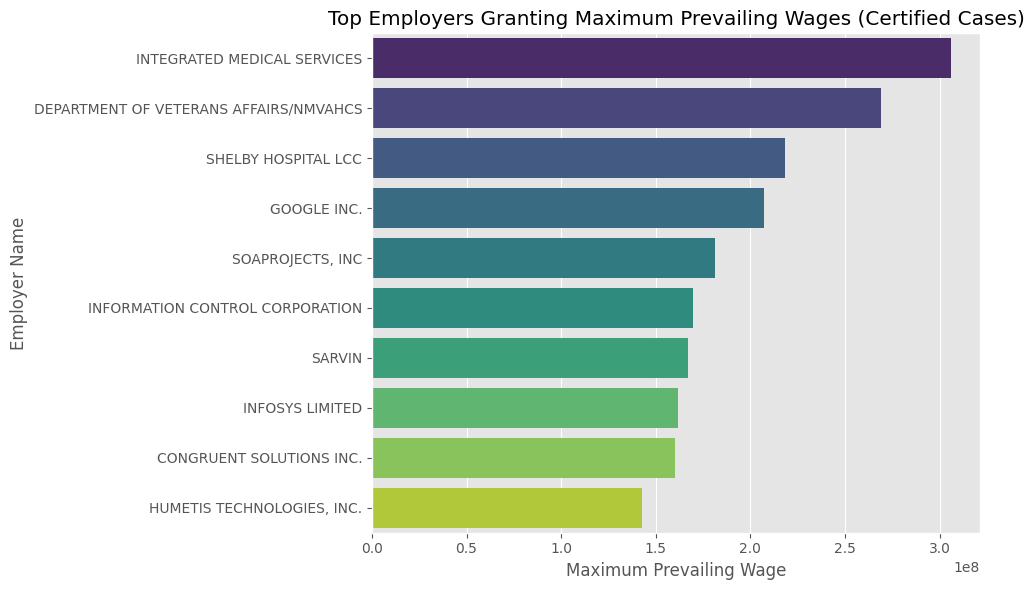

In [23]:
plt.figure(figsize=(10, 6), dpi=100)
barplot = sns.barplot(x=top_emp_max_wages['PREVAILING_WAGE'], y=top_emp_max_wages.index, orient='h', palette='viridis')
plt.title("Top Employers Granting Maximum Prevailing Wages (Certified Cases)")
plt.xlabel("Maximum Prevailing Wage")
plt.ylabel("Employer Name")
plt.tight_layout()
plt.show()

### Top 20 states filing highest visa petitions

C:\Users\aakar\AppData\Local\Temp\ipykernel_5400\1732497166.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_states_petitions.values, y=top_states_petitions.index, orient='h', palette='viridis')


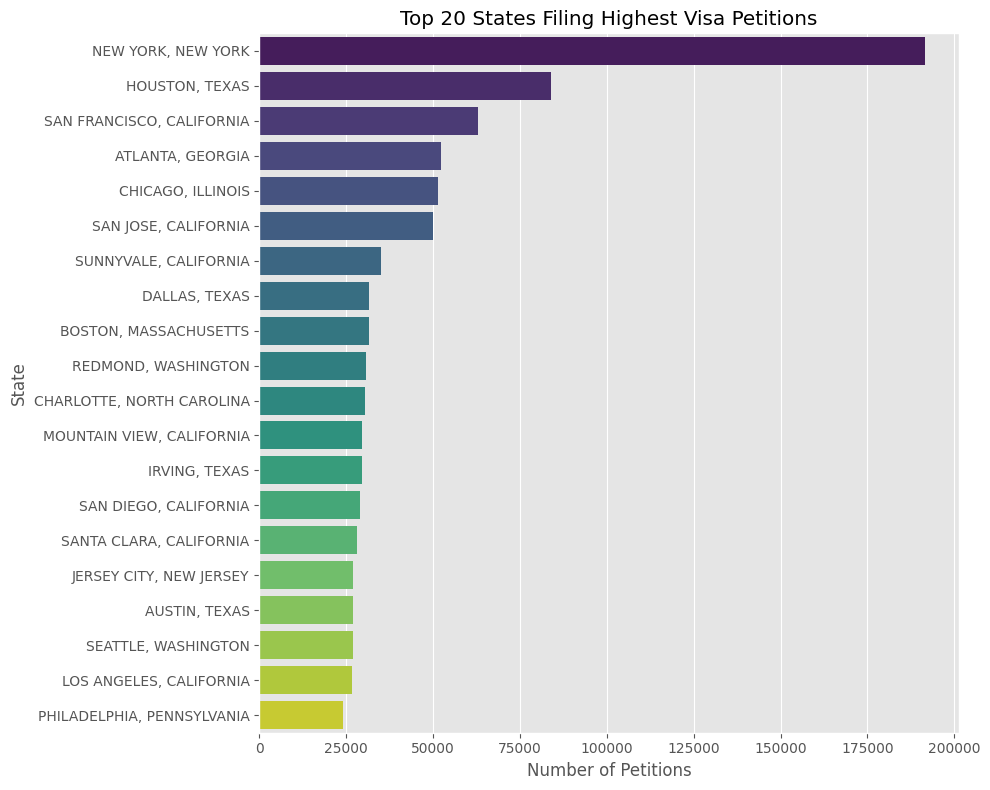

In [24]:
top_states_petitions = df['WORKSITE'].value_counts().nlargest(20)


plt.figure(figsize=(10, 8), dpi=100)
barplot = sns.barplot(x=top_states_petitions.values, y=top_states_petitions.index, orient='h', palette='viridis')
plt.title("Top 20 States Filing Highest Visa Petitions")
plt.xlabel("Number of Petitions")
plt.ylabel("State")


plt.tight_layout()
plt.show()


### Petition distribution by year

In [25]:
petition_by_year = df.groupby(['YEAR','CASE_STATUS']).size().reset_index(name='COUNT').sort_values('YEAR')
petition_by_year

,YEAR,CASE_STATUS,COUNT
0,2011.0,CERTIFIED,307936
1,2011.0,CERTIFIED-WITHDRAWN,11596
2,2011.0,DENIED,29130
3,2011.0,WITHDRAWN,10105
4,2012.0,CERTIFIED,352668
5,2012.0,CERTIFIED-WITHDRAWN,31118
6,2012.0,DENIED,21096
7,2012.0,WITHDRAWN,10725
8,2013.0,CERTIFIED,382951
9,2013.0,CERTIFIED-WITHDRAWN,35432


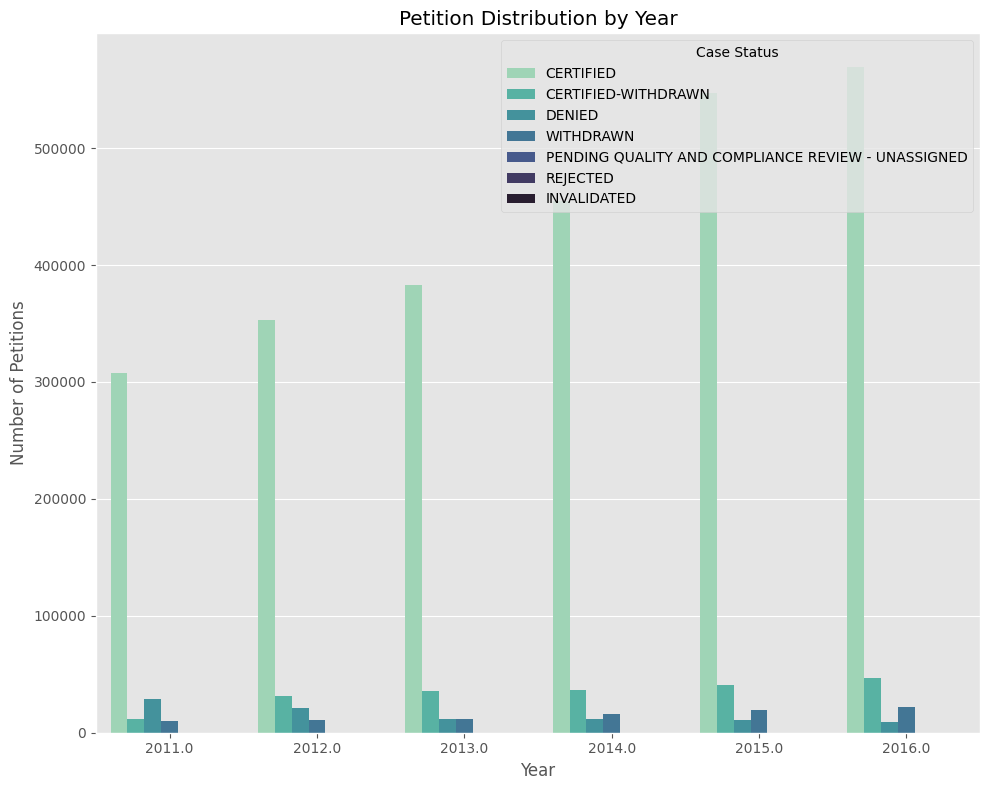

In [26]:

plt.figure(figsize=(10, 8), dpi=100)
barplot = sns.barplot(data=petition_by_year,x='YEAR',y='COUNT', hue= 'CASE_STATUS',palette='mako_r')
plt.title("Petition Distribution by Year")
plt.ylabel("Number of Petitions")
plt.xlabel("Year")

plt.legend(title='Case Status',loc='upper right')
plt.tight_layout()
plt.show()

### Number of visa petitions denied


In [27]:
num_petitions_denied = df[df['CASE_STATUS'] == 'DENIED'].shape[0]
num_petitions_denied

94346

### Rate of visas denied from last 5 years

In [28]:
last_5_years = df[df['YEAR'] >= df['YEAR'].max()-5]
total_petitions = last_5_years['YEAR'].value_counts()
denied_petitions = last_5_years[last_5_years['CASE_STATUS']=='DENIED']['YEAR'].value_counts()
rate = (denied_petitions / total_petitions)*100
print(rate)

YEAR
2011.0    8.119476
2012.0    5.075949
2013.0    2.742732
2014.0    2.290159
2015.0    1.765399
2016.0    1.416326
Name: count, dtype: float64


### Number of visa petitions filed by states

In [29]:
petitions_by_state = df['WORKSITE'].apply(lambda x: x.split(",")[-1].strip()).value_counts()
print(petitions_by_state)

WORKSITE
CALIFORNIA              559942
TEXAS                   294455
NEW YORK                291412
NEW JERSEY              214078
ILLINOIS                160814
MASSACHUSETTS           116466
PENNSYLVANIA            109960
FLORIDA                 105773
GEORGIA                 103168
WASHINGTON              102801
VIRGINIA                 90028
MICHIGAN                 82964
NORTH CAROLINA           79672
OHIO                     76575
MARYLAND                 56257
CONNECTICUT              50253
MINNESOTA                48686
ARIZONA                  42054
MISSOURI                 34813
WISCONSIN                32672
COLORADO                 32038
INDIANA                  30516
TENNESSEE                27673
OREGON                   23790
DISTRICT OF COLUMBIA     22708
DELAWARE                 18138
IOWA                     16743
ARKANSAS                 14762
KANSAS                   13782
UTAH                     13107
SOUTH CAROLINA           12932
KENTUCKY                 12702

### Rate of denial of visa petition by the states

In [30]:

df['temp'] = df['WORKSITE'].apply(lambda x: x.split(",")[-1].strip())

# Count the total number of visa petitions for each state
total_petitions_by_state = df['temp'].value_counts()

# Count the number of denied visa petitions for each state
denied_petitions_by_state = df[df['CASE_STATUS'] == 'DENIED']['temp'].value_counts()

# Calculate the rate of denial for each state
denial_rate_by_state = (denied_petitions_by_state / total_petitions_by_state) * 100

# Drop the temporary column
df.drop('temp', axis=1, inplace=True)

print(denial_rate_by_state)


temp
ALABAMA                  5.091193
ALASKA                  11.318052
ARIZONA                  2.751225
ARKANSAS                 2.255792
CALIFORNIA               3.168185
COLORADO                 3.567638
CONNECTICUT              2.459555
DELAWARE                 2.023376
DISTRICT OF COLUMBIA     5.205214
FLORIDA                  5.272612
GEORGIA                  2.671371
HAWAII                  10.394456
IDAHO                    4.628967
ILLINOIS                 2.453145
INDIANA                  2.726439
IOWA                     2.610046
KANSAS                   3.156291
KENTUCKY                 3.369548
LOUISIANA                5.304653
MAINE                    3.471159
MARYLAND                 3.741757
MASSACHUSETTS            3.115931
MICHIGAN                 2.699966
MINNESOTA                2.310726
MISSISSIPPI              6.510539
MISSOURI                 2.318100
MONTANA                  8.519270
NA                      20.227525
NEBRASKA                 3.035869
NEVADA   

### Top 25 job titles

In [31]:
job_titles = df['JOB_TITLE'].value_counts().head(25)
job_titles

JOB_TITLE
PROGRAMMER ANALYST             249081
SOFTWARE ENGINEER              121307
COMPUTER PROGRAMMER             70570
SYSTEMS ANALYST                 61965
SOFTWARE DEVELOPER              42907
BUSINESS ANALYST                39681
COMPUTER SYSTEMS ANALYST        35086
TECHNOLOGY LEAD - US            28350
SENIOR SOFTWARE ENGINEER        27133
TECHNOLOGY ANALYST - US         26055
ASSISTANT PROFESSOR             25265
SENIOR CONSULTANT               24904
CONSULTANT                      23081
PHYSICAL THERAPIST              20207
PROJECT MANAGER                 20172
DATABASE ADMINISTRATOR          16665
ACCOUNTANT                      14048
COMPUTER PROGRAMMER ANALYST     13634
RESEARCH ASSOCIATE              13623
DEVELOPER                       12909
ASSOCIATE                       12502
ANALYST                         11751
LEAD ENGINEER                   11157
COMPUTER SYSTEMS ENGINEER       11090
SENIOR SOFTWARE DEVELOPER       10208
Name: count, dtype: int64

C:\Users\aakar\AppData\Local\Temp\ipykernel_5400\163960247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(y=job_titles.index, x=job_titles.values, orient='h',palette='viridis')


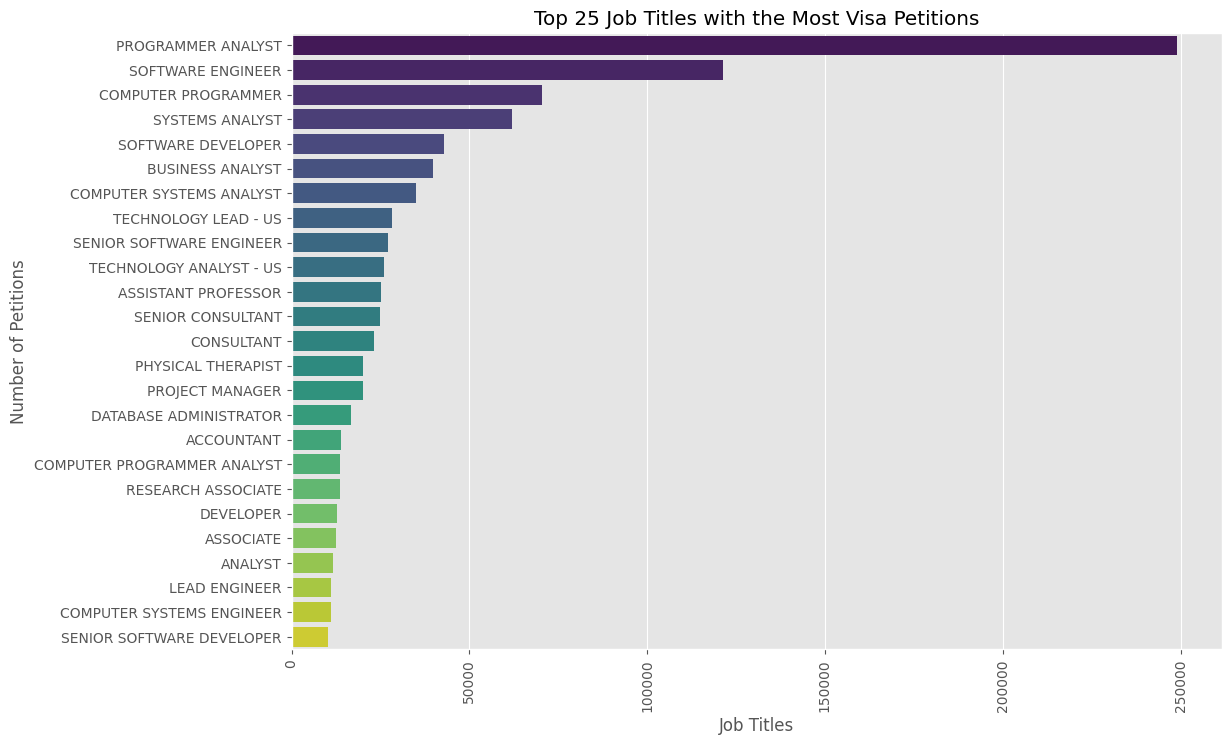

In [32]:
plt.figure(figsize=(12, 8), dpi=100)
barplot = sns.barplot(y=job_titles.index, x=job_titles.values, orient='h',palette='viridis')
plt.title("Top 25 Job Titles with the Most Visa Petitions")
plt.xlabel("Job Titles")
plt.ylabel("Number of Petitions")
plt.xticks(rotation=90)
plt.show()

###  Top 10 occupations with the highest wages


In [33]:
df.sort_values('PREVAILING_WAGE',ascending=False)[['SOC_NAME','JOB_TITLE']].head(10)

,SOC_NAME,JOB_TITLE
2163248,Physical Therapists,PHYSICAL THERAPISTS
2797982,Computer Programmers,SOFTWARE DEVELOPER
1673867,Statisticians,PROJECT MANAGER
1819718,"Software Developers, Applications",.NET DEVELOPER
2775906,Medical and Health Services Managers,PROGRAM MANAGER (POSITIVE PATHWAYS)
1547574,Computer Systems Analysts,PROGRAMMER/ANALYST
1668384,"Life Scientists, All Other",RESEARCH ASSOCIATE
1805875,Architectural and Engineering Managers,"MANAGER, SOFTWARE ENGINEERING"
2796071,Financial Managers,"MANAGING DIRECTOR, EQUITY DERIVATIVES"
1698325,"Internists, General",INTERNIST


### To analyse the fraction of full-time and part-time workers

In [34]:
full_time_count = df[df['FULL_TIME_POSITION'] == 'Y'].shape[0]
part_time_count = df[df['FULL_TIME_POSITION'] == 'N'].shape[0]
total_count = full_time_count + part_time_count

# Calculate the fraction of full-time and part-time workers
fraction_full_time = full_time_count / total_count
fraction_part_time = part_time_count / total_count

print("Fraction of Full-Time Workers:", fraction_full_time)
print("Fraction of Part-Time Workers:", fraction_part_time)


Fraction of Full-Time Workers: 0.8580056740177547
Fraction of Part-Time Workers: 0.1419943259822452


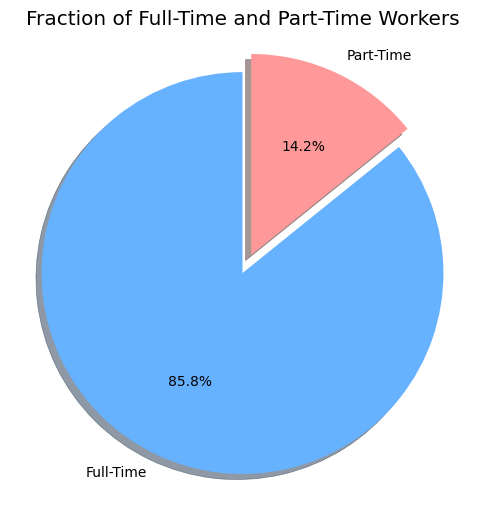

In [35]:
fractions = [fraction_full_time, fraction_part_time]
labels = ['Full-Time', 'Part-Time']
colors = ['#66B2FF', '#FF9999']
explode = [0.1, 0]

plt.figure(figsize=(6, 6))
plt.pie(fractions, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Fraction of Full-Time and Part-Time Workers')
plt.axis('equal')  

plt.show()

## Training The Model

In [36]:
training_dataframe = pd.read_csv("Cleaned_data.csv")

In [37]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_NAME.nunique())
print("Prevailing Wages ",training_dataframe.PREVAILING_WAGE.nunique())
print("Unique SOCs ", training_dataframe.SOC_NAME.nunique())
print("Unique Job Titles ",training_dataframe.JOB_TITLE.nunique())
print("Unique Filing Year ",training_dataframe.YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

Case Status  7
Unique Employers  236013
Prevailing Wages  56156
Unique SOCs  2132
Unique Job Titles  287549
Unique Filing Year  6
Unique Worksite State  18622
Unique Employment Type  2


In [38]:
print(training_dataframe['PREVAILING_WAGE'])

0           36067.0
1          242674.0
2          193066.0
3          220314.0
4          157518.4
             ...   
3002453     65021.0
3002454     65021.0
3002455     65021.0
3002456     65021.0
3002457     65021.0
Name: PREVAILING_WAGE, Length: 3002458, dtype: float64


In [39]:
def wage_categorization(wage):
    if wage <=50000:
        return "VERY LOW"
    elif wage >50000 and wage <= 70000:
        return "LOW"
    elif wage >70000 and wage <= 90000:
        return "MEDIUM"
    elif wage >90000 and wage<=150000:
        return "HIGH"
    elif wage >=150000:
        return "VERY HIGH"

In [40]:
training_dataframe['WAGE_CATEGORY'] = training_dataframe['PREVAILING_WAGE'].apply(wage_categorization)

In [41]:
def state_extractor(work_site):
    return work_site.split(', ')[1]

training_dataframe['WORKSITE'] = training_dataframe['WORKSITE'].apply(state_extractor)
training_dataframe.WORKSITE.unique()

array(['MICHIGAN', 'TEXAS', 'NEW JERSEY', 'COLORADO', 'MISSOURI',
       'FLORIDA', 'CALIFORNIA', 'VIRGINIA', 'PENNSYLVANIA',
       'MASSACHUSETTS', 'WISCONSIN', 'ILLINOIS', 'DISTRICT OF COLUMBIA',
       'NORTH CAROLINA', 'RHODE ISLAND', 'OHIO', 'WASHINGTON', 'GEORGIA',
       'NEW YORK', 'INDIANA', 'MARYLAND', 'NEVADA', 'NEW HAMPSHIRE',
       'LOUISIANA', 'MINNESOTA', 'SOUTH CAROLINA', 'ARIZONA', 'TENNESSEE',
       'MISSISSIPPI', 'HAWAII', 'UTAH', 'DELAWARE', 'NA', 'KANSAS',
       'CONNECTICUT', 'MAINE', 'NEBRASKA', 'OKLAHOMA', 'ARKANSAS',
       'KENTUCKY', 'PUERTO RICO', 'ALASKA', 'WYOMING', 'IOWA', 'OREGON',
       'IDAHO', 'NEW MEXICO', 'WEST VIRGINIA', 'SOUTH DAKOTA',
       'NORTH DAKOTA', 'ALABAMA', 'VERMONT', 'MONTANA'], dtype=object)

In [42]:
import pandas as pd

status_mapping = {
    'CERTIFIED': 'CERTIFIED',
    'CERTIFIED-WITHDRAWN': 'CERTIFIED',
    'DENIED': 'DENIED',
    'WITHDRAWN': 'DENIED',
    'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED': 'DENIED',
    'REJECTED': 'DENIED',
    'INVALIDATED': 'DENIED'
}

training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].map(status_mapping)


In [43]:
training_dataframe_1 = training_dataframe.loc[:,['EMPLOYER_NAME', 'CASE_STATUS']]
training_dataframe_1s = training_dataframe.loc[:,['SOC_NAME', 'CASE_STATUS']]
training_dataframe_1j = training_dataframe.loc[:,['JOB_TITLE', 'CASE_STATUS']]

In [44]:
training_dataframe_1

,EMPLOYER_NAME,CASE_STATUS
0,UNIVERSITY OF MICHIGAN,CERTIFIED
1,"GOODMAN NETWORKS, INC.",CERTIFIED
2,"PORTS AMERICA GROUP, INC.",CERTIFIED
3,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CERTIFIED
4,PEABODY INVESTMENTS CORP.,DENIED
...,...,...
3002453,INFOSYS LIMITED,CERTIFIED
3002454,INFOSYS LIMITED,CERTIFIED
3002455,INFOSYS LIMITED,CERTIFIED
3002456,INFOSYS LIMITED,CERTIFIED


In [45]:
training_dataframe_1s

,SOC_NAME,CASE_STATUS
0,BIOCHEMISTS AND BIOPHYSICISTS,CERTIFIED
1,CHIEF EXECUTIVES,CERTIFIED
2,CHIEF EXECUTIVES,CERTIFIED
3,CHIEF EXECUTIVES,CERTIFIED
4,CHIEF EXECUTIVES,DENIED
...,...,...
3002453,Computer Systems Analysts,CERTIFIED
3002454,Computer Systems Analysts,CERTIFIED
3002455,Computer Systems Analysts,CERTIFIED
3002456,Computer Systems Analysts,CERTIFIED


In [46]:
training_dataframe_1j

,JOB_TITLE,CASE_STATUS
0,POSTDOCTORAL RESEARCH FELLOW,CERTIFIED
1,CHIEF OPERATING OFFICER,CERTIFIED
2,CHIEF PROCESS OFFICER,CERTIFIED
3,"REGIONAL PRESIDEN, AMERICAS",CERTIFIED
4,PRESIDENT MONGOLIA AND INDIA,DENIED
...,...,...
3002453,PROGRAMMER ANALYST,CERTIFIED
3002454,PROGRAMMER ANALYST,CERTIFIED
3002455,PROGRAMMER ANALYST,CERTIFIED
3002456,PROGRAMMER ANALYST,CERTIFIED


In [47]:
training_dataframe_2_C = training_dataframe_1[training_dataframe_1.CASE_STATUS == 'CERTIFIED'].EMPLOYER_NAME
training_dataframe_2_Cs = training_dataframe_1s[training_dataframe_1s.CASE_STATUS == 'CERTIFIED'].SOC_NAME
training_dataframe_2_Cj = training_dataframe_1j[training_dataframe_1j.CASE_STATUS == 'CERTIFIED'].JOB_TITLE
positive_counts = training_dataframe_2_C.value_counts()
positive_counts_s = training_dataframe_2_Cs.value_counts()
positive_counts_j = training_dataframe_2_Cj.value_counts()

In [48]:
total_counts = training_dataframe_1.EMPLOYER_NAME.value_counts()
total_counts_s = training_dataframe_1s.SOC_NAME.value_counts()
total_counts_j = training_dataframe_1j.JOB_TITLE.value_counts()

In [49]:
def categorisation_visagrant(ratio_of_acceptance):
    if ratio_of_acceptance == -1:
        return "AR"
    elif ratio_of_acceptance >=0.0 and ratio_of_acceptance<0.20:
        return "VLA"
    elif ratio_of_acceptance>=0.20 and ratio_of_acceptance<0.40:
        return "LA"
    elif ratio_of_acceptance>=0.40 and ratio_of_acceptance<0.60:
        return "MA"
    elif ratio_of_acceptance>=0.60 and ratio_of_acceptance<0.80:
        return "HA"
    elif ratio_of_acceptance>=0.80:
        return "VHA"

In [50]:
final_ratio_series = positive_counts / total_counts

final_ratio_series.fillna(-1, inplace=True)
final_classification_employer = final_ratio_series.apply(categorisation_visagrant)
training_dataframe['EMPLOYER_ACCEPTANCE'] = training_dataframe.EMPLOYER_NAME.map(final_classification_employer)
training_dataframe

,Unnamed: 0.1,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE
0,0,1,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826,VERY LOW,VHA
1,1,2,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843,VERY HIGH,VHA
2,2,3,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158,VERY HIGH,VHA
3,3,4,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236,VERY HIGH,VHA
4,4,5,DENIED,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003,VERY HIGH,VHA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002453,3002454,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,NEW YORK,-74.005941,40.712784,LOW,VHA
3002454,3002454,3002455,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,TEXAS,-97.134178,32.941236,LOW,VHA
3002455,3002455,3002456,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,NEW JERSEY,-74.909890,40.636768,LOW,VHA
3002456,3002456,3002457,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,MARYLAND,-76.780253,39.419550,LOW,VHA


In [51]:
final_ratio_series_s = positive_counts_s / total_counts_s
final_ratio_series_s.fillna(-1, inplace=True)
final_classification_soc = final_ratio_series_s.apply(categorisation_visagrant)
training_dataframe['SOC_ACCEPTANCE'] = training_dataframe.SOC_NAME.map(final_classification_soc)

In [52]:
final_ratio_series_j = positive_counts_j / total_counts_j
final_ratio_series_j.fillna(-1, inplace=True)
final_classification_job = final_ratio_series_j.apply(categorisation_visagrant)
training_dataframe['JOB_ACCEPTANCE'] = training_dataframe.JOB_TITLE.map(final_classification_job)

In [53]:
print("Case Status ",training_dataframe.CASE_STATUS.nunique())
print("Unique Employers ",training_dataframe.EMPLOYER_ACCEPTANCE.nunique())
print("Wages Category", training_dataframe.WAGE_CATEGORY.nunique())
print("Unique SOCs ", training_dataframe.SOC_ACCEPTANCE.nunique())
print("Unique Job Titles ",training_dataframe.JOB_ACCEPTANCE.nunique())
print("Unique Filing Year ",training_dataframe.YEAR.nunique())
print("Unique Worksite State ",training_dataframe.WORKSITE.nunique())
print("Unique Employment Type ", training_dataframe.FULL_TIME_POSITION.nunique())

training_dataframe


Case Status  2
Unique Employers  6
Wages Category 5
Unique SOCs  6
Unique Job Titles  6
Unique Filing Year  6
Unique Worksite State  53
Unique Employment Type  2


,Unnamed: 0.1,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,SOC_ACCEPTANCE,JOB_ACCEPTANCE
0,0,1,CERTIFIED,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,MICHIGAN,-83.743038,42.280826,VERY LOW,VHA,VHA,VHA
1,1,2,CERTIFIED,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,TEXAS,-96.698886,33.019843,VERY HIGH,VHA,VHA,VHA
2,2,3,CERTIFIED,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,NEW JERSEY,-74.077642,40.728158,VERY HIGH,VHA,VHA,VHA
3,3,4,CERTIFIED,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,COLORADO,-104.990251,39.739236,VERY HIGH,VHA,VHA,VHA
4,4,5,DENIED,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,MISSOURI,-90.199404,38.627003,VERY HIGH,VHA,VHA,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002453,3002453,3002454,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,NEW YORK,-74.005941,40.712784,LOW,VHA,VHA,VHA
3002454,3002454,3002455,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,TEXAS,-97.134178,32.941236,LOW,VHA,VHA,VHA
3002455,3002455,3002456,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,NEW JERSEY,-74.909890,40.636768,LOW,VHA,VHA,VHA
3002456,3002456,3002457,CERTIFIED,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,65021.0,2014.0,MARYLAND,-76.780253,39.419550,LOW,VHA,VHA,VHA


In [54]:
dict_cs = {"CERTIFIED" : 1, "DENIED": 0}
dict_fp = {"Y" : 1, "N" : 0}
try:
    
    training_dataframe['CASE_STATUS'] = training_dataframe['CASE_STATUS'].apply(lambda x: dict_cs[x])
    training_dataframe['FULL_TIME_POSITION'] = training_dataframe['FULL_TIME_POSITION'].apply(lambda x: dict_fp[x])
except:
    pass

In [55]:
training_dataframe['YEAR'] = training_dataframe['YEAR'].astype('int')
training_dataframe.sort_index(inplace = True)
training_dataframe = training_dataframe.loc[:, ['CASE_STATUS', 'YEAR','WORKSITE', 'WAGE_CATEGORY',  'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE', 'FULL_TIME_POSITION']]
training_dataframe.head()

,CASE_STATUS,YEAR,WORKSITE,WAGE_CATEGORY,EMPLOYER_ACCEPTANCE,JOB_ACCEPTANCE,SOC_ACCEPTANCE,FULL_TIME_POSITION
0,1,2016,MICHIGAN,VERY LOW,VHA,VHA,VHA,0
1,1,2016,TEXAS,VERY HIGH,VHA,VHA,VHA,1
2,1,2016,NEW JERSEY,VERY HIGH,VHA,VHA,VHA,1
3,1,2016,COLORADO,VERY HIGH,VHA,VHA,VHA,1
4,0,2016,MISSOURI,VERY HIGH,VHA,MA,VHA,1


In [56]:
final_df_train = pd.get_dummies(training_dataframe, columns=['WORKSITE', 'WAGE_CATEGORY', 'EMPLOYER_ACCEPTANCE', 'JOB_ACCEPTANCE', 'SOC_ACCEPTANCE'], drop_first=True)
final_df_train.head()

,CASE_STATUS,YEAR,FULL_TIME_POSITION,WORKSITE_ALASKA,WORKSITE_ARIZONA,WORKSITE_ARKANSAS,WORKSITE_CALIFORNIA,WORKSITE_COLORADO,WORKSITE_CONNECTICUT,WORKSITE_DELAWARE,...,JOB_ACCEPTANCE_HA,JOB_ACCEPTANCE_LA,JOB_ACCEPTANCE_MA,JOB_ACCEPTANCE_VHA,JOB_ACCEPTANCE_VLA,SOC_ACCEPTANCE_HA,SOC_ACCEPTANCE_LA,SOC_ACCEPTANCE_MA,SOC_ACCEPTANCE_VHA,SOC_ACCEPTANCE_VLA
0,1,2016,0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,1,2016,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,1,2016,1,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,1,2016,1,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
4,0,2016,1,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [57]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = final_df_train.drop(columns=['CASE_STATUS'])
y = final_df_train['CASE_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Train set after SMOTE - Features:", X_train_resampled.shape, "Target:", y_train_resampled.shape)
print("Test set - Features:", X_test.shape, "Target:", y_test.shape)


Train set after SMOTE - Features: (4509352, 73) Target: (4509352,)
Test set - Features: (600492, 73) Target: (600492,)


## Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)   
y_pred = dtree.predict(X_test)

y_prob = dtree.predict_proba(X_test)

print("test\n", y_test[:10])
print("pred", y_pred[:10])
print()

print(metrics.confusion_matrix(y_test,y_pred))
print(metrics.classification_report(y_test, y_pred))

test
 1506202    0
1741120    1
1196580    1
1356851    1
2257415    1
2018901    1
2022751    1
2643289    1
2980995    1
2838605    1
Name: CASE_STATUS, dtype: int64
pred [1 1 1 1 1 1 1 1 1 1]

[[  8898  27975]
 [  5774 557845]]
              precision    recall  f1-score   support

           0       0.61      0.24      0.35     36873
           1       0.95      0.99      0.97    563619

    accuracy                           0.94    600492
   macro avg       0.78      0.62      0.66    600492
weighted avg       0.93      0.94      0.93    600492



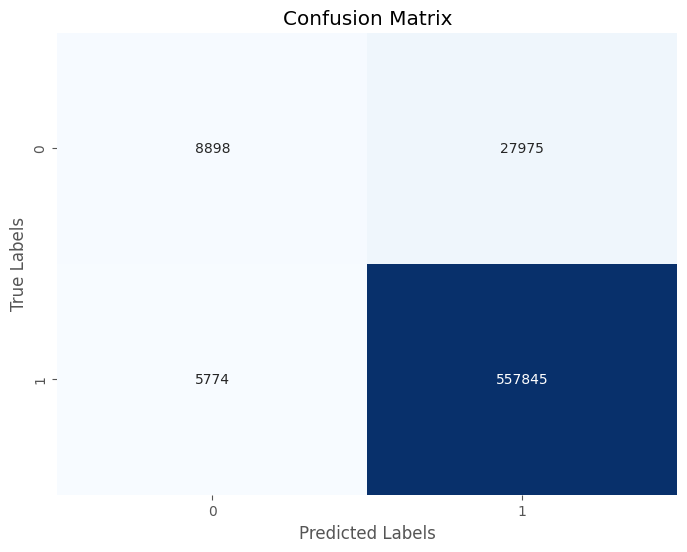

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=dtree.classes_, yticklabels=dtree.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
